<a href="https://colab.research.google.com/github/Saipavan1361/IIITH-PROJECTS-LABS/blob/main/Probability_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

In [ ]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [ ]:
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Heads    51
Tails    49
Name: count, dtype: int64


In [ ]:
results = pd.Series([np.sum(toss_coin(20) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [ ]:
results = pd.Series([np.sum(toss_coin(500) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [ ]:
results = {shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

In [ ]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

11 cards were thrown: KS QC 10D 5H 7C 6D JC 2S 7S QH 5S AD
10 cards were thrown: 2S QD 3H 7C 6C 2D 9H 5C QH JS AC
2 cards were thrown: 7H 7S AC
11 cards were thrown: JH 6C 10S 9D QS 9C 3H 8C 5C 7S 10H AC
3 cards were thrown: 6S 8S 5S AD
6 cards were thrown: QS 5S KS 4H 9H 4D AH
0 cards were thrown: AH
12 cards were thrown: 10D 7S 4D 3H 7H JH JD KS 2S 4H 3D QS AH
14 cards were thrown: JC QC 3S 8D 7S 6C 6D 9D 9S 7H 6S JS 4D 2C AC
0 cards were thrown: AS

9.4355 cards are tossed before we see the first ace!


In [ ]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

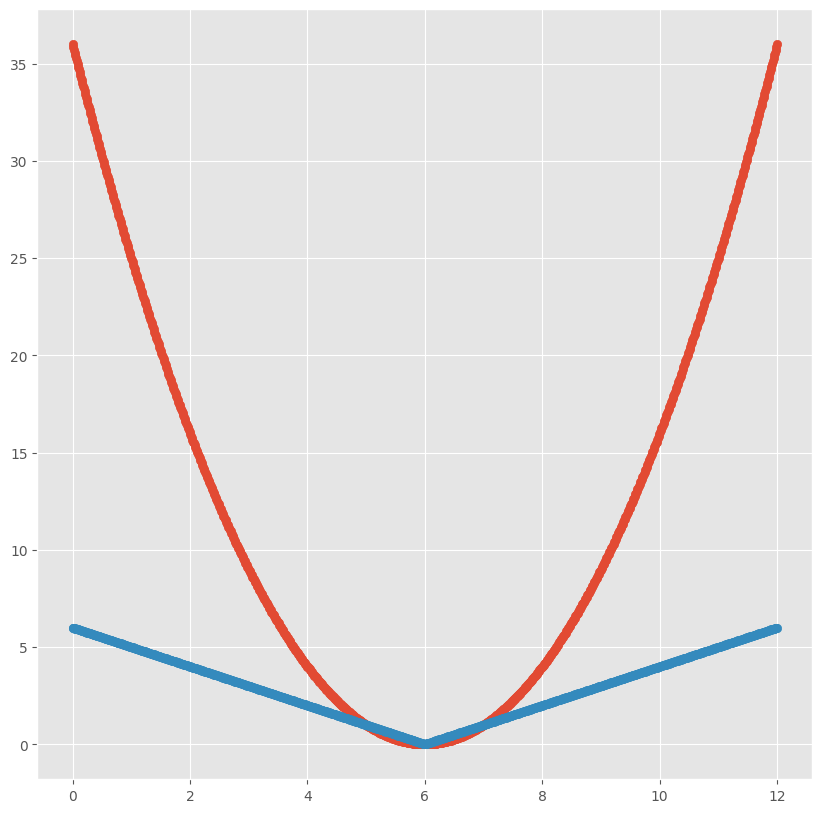

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

In [ ]:
grades = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print(grades.shape)
grades.agg(["mean", "var", "std"])

(26, 4)


TypeError: Could not convert string 'ArnoldBobCassandraDonovanEmilyFabianGromHilaryIvanJohnKevinLoiusMandyNatalieOliverPatrickQuitonRobertSofiaTerryUsmanVanessaWilsonXavierYukiZayn' to numeric

In [ ]:
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

In [ ]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()

In [ ]:
grades.head()

In [ ]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

In [ ]:
from scipy.stats import binom

In [ ]:
binom.pmf(k=5, n=5, p=0.25)

In [ ]:
1 - binom.pmf(k=4, n=5, p=0.75) - binom.pmf(k=5, n=5, p=0.75)

In [ ]:
binom.cdf(3, n=5, p=0.75)

In [ ]:
from scipy.stats import norm

In [ ]:
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

In [ ]:
norm.cdf(0)

In [ ]:
norm.ppf(0.5)

In [ ]:
norm.ppf(0.84, loc=169.57, scale=7.57)

In [ ]:
169.57 + 7.57

In [ ]:
norm.ppf(0.975, loc=169.57, scale=7.57)

In [ ]:
169.57 + 2 * 7.57

In [ ]:
norm.ppf(0.0015, loc=169.57, scale=7.57)

In [ ]:
169.57 - 3 * 7.57

In [ ]:
from scipy.stats import poisson

In [ ]:
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()

In [ ]:
# for lambda=2, having 2 events is a lot more likely

plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [ ]:
x @ f2

In [ ]:
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [ ]:
x @ f3

In [ ]:
poisson.pmf(3, 5)

In [ ]:
from scipy.stats import poisson

In [ ]:
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

In [ ]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)